# ML 2. Unsupervised learning - Kmeans

In [5]:
%pylab inline
import seaborn

Populating the interactive namespace from numpy and matplotlib


## Step 1
Generate data in 3 clusters using _sklearn.datasets.make_blobs_. Generate 15 samples in ${\rm I\!R^2}$,  three clusters with std 1. 

note: use the random seed = 1

In [28]:
from sklearn.datasets import make_blobs
seed(1)

n_centers = 3

X,Y = make_blobs(n_samples=15, n_features = 2, centers=n_centers, cluster_std=1)

## Step 2
Plot the base data each class with a different color

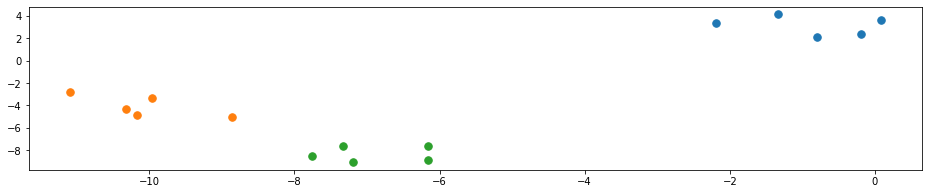

In [29]:
def plot_clusters(X,Y):

    figure(figsize=(16,3))
    for i in [0,1,2]:
        ix = (Y==i)
        plot(X[ix,0],X[ix,1],'.',ms=15)

plot_clusters(X,Y)

# Step 3
Randomly select the centroids as the first samples of the data set.

In [30]:
Centroids = X[:n_centers,:]

# Step 4
Create a function to compute the distance matrix to each centroid (dim: num of samples vs num of centrioids), using the eucledean distance (scipy.spatial.distance.euclidean)

In [31]:
from scipy.spatial.distance import euclidean

def dist(C,X):
    D = zeros((X.shape[0],C.shape[0]))
    
    for c in range(n_centers):
        for s in range(X.shape[0]):
            D[s,c]=  euclidean(X[s],C[c])
    return D

D = dist(Centroids,X)

D


array([[ 0.        ,  1.68521836,  1.61816677],
       [ 1.68521836,  0.        ,  1.01936959],
       [ 1.61816677,  1.01936959,  0.        ],
       [ 5.665243  ,  3.98046081,  4.43336658],
       [12.67542196, 12.25961461, 13.26159421],
       [ 1.05431551,  1.4732775 ,  0.78360581],
       [12.18855521, 11.72109557, 12.72801936],
       [ 1.18622243,  1.16981063,  1.8295073 ],
       [13.95921794, 13.49067763, 14.49890424],
       [12.80357115, 12.10429631, 13.12361611],
       [ 6.65259651,  4.99610792,  5.6269078 ],
       [ 4.64823179,  2.9912377 ,  3.66790654],
       [13.86045459, 13.21647714, 14.23501875],
       [ 7.79025971,  6.11199106,  6.64309641],
       [ 6.12528969,  4.44056616,  4.93130781]])

# Step 5 
Iterate on selecting

1. Find the nearest centroid for each sample
2. Compute the new centroids
3. Assing new centroids for each sample.
4. if 1 and 3 are equal stop.

[[-6.16402623 -8.83695596]
 [-5.69489254 -1.67394918]
 [-7.47215767 -8.81948959]]
[[-6.16365885 -8.24384486]
 [-3.64120504  1.34400941]
 [-8.60521651 -6.58061692]]
[[ -6.92088066  -8.34990831]
 [ -0.88692097   3.11744481]
 [-10.08160878  -4.08020157]]
[0 0 0 2 1 0 1 0 1 1 2 2 1 2 2]
[2 2 2 1 0 2 0 2 0 0 1 1 0 1 1]


<Figure size 432x288 with 0 Axes>

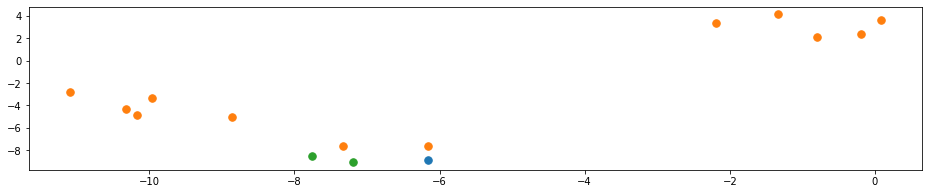

<Figure size 432x288 with 0 Axes>

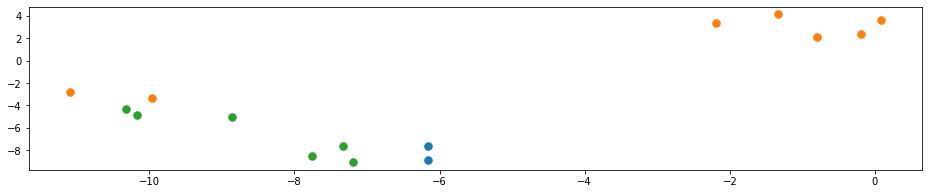

<Figure size 432x288 with 0 Axes>

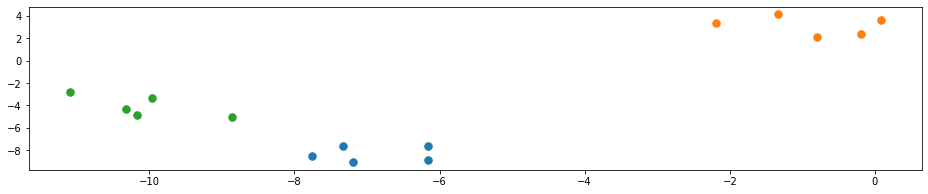

<Figure size 432x288 with 0 Axes>

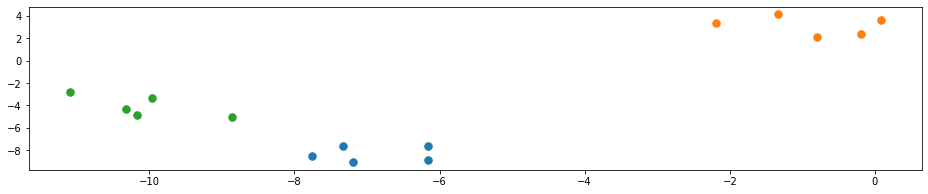

In [32]:
Y_est = argmin(D,1)

figure()
plot_clusters(X,Y_est)

def compute_centroids(X,Y):
    C = zeros((3,X.shape[1]))
    
    for i in [0,1,2]:
        C[i,:] = mean(X[Y==i,:],0)
    return C


for i in range(5):
    Centroids = compute_centroids(X,Y_est)
    print(Centroids)
    D  = dist(Centroids,X)
    Y_old = Y_est
    Y_est = argmin(D,1)
    figure()
    plot_clusters(X,Y_est)
    if all(Y_est==Y_old):
        break
    
    
print(Y_est)
print(Y)
    


# Step 6
Estimate the error with sklearn.metrics.adjusted_rand_score

In [20]:
from sklearn import metrics



In [33]:
X

array([[ -6.16402623,  -8.83695596],
       [ -7.33277026,  -7.62287264],
       [ -7.75654294,  -8.54998163],
       [-10.17014071,  -4.83120697],
       [ -0.19745197,   2.34634916],
       [ -7.18777241,  -9.08899754],
       [ -0.79415228,   2.10495117],
       [ -6.16329146,  -7.65073377],
       [  0.08525186,   3.64528297],
       [ -2.18773166,   3.33352125],
       [ -9.95549876,  -3.37053333],
       [ -8.86394306,  -5.05323981],
       [ -1.34052081,   4.15711949],
       [-11.09833168,  -2.80862484],
       [-10.32012971,  -4.3374029 ]])

In [35]:
mean(X,1)

array([-7.5004911 , -7.47782145, -8.15326228, -7.50067384,  1.0744486 ,
       -8.13838497,  0.65539945, -6.90701261,  1.86526741,  0.57289479,
       -6.66301605, -6.95859144,  1.40829934, -6.95347826, -7.3287663 ])